In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np  
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [3]:
base_path = '/content/drive/MyDrive/ktintern'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_path,
                                                            'checkpoints',
                                                            'inceptionV3_model.h5'))
inceptionV3_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [15]:
class FeatureExtractor:
    def __init__(self):
        base_model = inceptionV3_model
        base_inputs = base_model.layers[0].input
        base_outputs = base_model.layers[-2].output
        self.model = Model(inputs=base_inputs, outputs=base_outputs)

    def rgba2rgb(self, rgba, background=(255,255,255)):
        row, col, ch = rgba.shape

        if ch == 3:
            return rgba
        assert ch == 4, 'RGBA image has 4 channels.'

        rgb = np.zeros((row, col, 3), dtype='float32')
        r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
        a = np.asarray(a, dtype='float32') / 255.0

        R, G, B = background
        rgb[:,:,0] = r * a + (1.0 - a) * R
        rgb[:,:,1] = g * a + (1.0 - a) * G
        rgb[:,:,2] = b * a + (1.0 - a) * B

        return np.asarray( rgb, dtype='uint8' )


    def extract(self, img):
        display(img)
        img = image.img_to_array(img)
        img = self.rgba2rgb(img)
        img = img[107:-106, 107:-106]

        plt.imshow(img, interpolation='nearest')
        plt.show()

        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')
        img = img / 255.0

        feature = self.model.predict(img)[0]
        print(feature.shape)
        return feature / np.linalg.norm(feature)

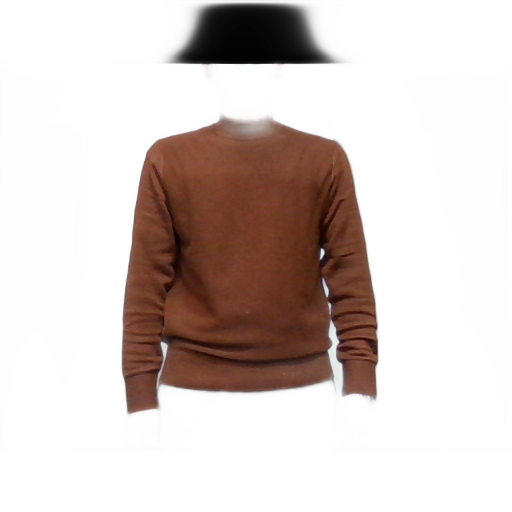

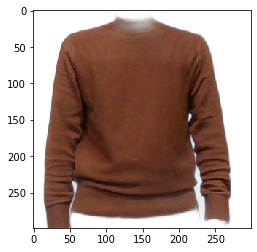

(2048,)


In [16]:
file_path = 'datasets/deep_test/test1'
test_path = os.path.join(base_path, file_path, 'out3_1.png')

test_image = image.load_img(test_path, color_mode='rgba')
fe = FeatureExtractor()
feature = fe.extract(img=test_image)

In [17]:
feature

array([0.03370314, 0.        , 0.06529236, ..., 0.00107403, 0.02661647,
       0.06497224], dtype=float32)